<a href="https://colab.research.google.com/github/mdaugherity/Numerical2024/blob/main/calc/Week_7_Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 351, Fall 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical Derivatives
In general there are three strategies for finding numerical derivatives:
* If the data are noisy, you should fit it first then take derivative of the fit
* Interpolate the data and use spline derivative (this is often fast, easy, and good enough!)
* Estimate the derivative directly from the data points with a little help from Taylor



# Forward Difference and Errors
Experiment with the accuracy of the forward difference approximation.  What is the optimal step size?

In [2]:
def f(x):  # our function
  return np.exp(x)

def df_exact(x):  # analytic derivative
  return np.exp(x)

def fdiff(x,h): # forward difference
  return  (f(x+h)-f(x))/h

def fdiff_error(x,h):
    return fdiff(x,h) - df_exact(x)

In [3]:
x=1
fdiff_error(x,1e-8)  # try different step sizes to minimize error

-6.60275079056305e-09

In [4]:
h = np.logspace(-1,-16,16)
fdiff_error(1, h)

array([ 1.40560126e-01,  1.36368273e-02,  1.35959407e-03,  1.35918624e-04,
        1.35914977e-05,  1.35897157e-06,  1.39946688e-07, -6.60275079e-09,
        2.15441854e-07,  1.54770948e-06,  3.26339542e-05,  4.32314243e-04,
       -4.55864177e-04, -9.33764837e-03,  3.90342640e-01, -2.71828183e+00])

In [5]:
e = fdiff_error(0.1, h)
print(np.c_[h,e] ) # a shortcut for displaying 1D arrays as columns in 2D array, a very lazy way of printing output

[[ 1.00000000e-01  5.71474828e-02]
 [ 1.00000000e-02  5.54432025e-03]
 [ 1.00000000e-03  5.52769700e-04]
 [ 1.00000000e-04  5.52603882e-05]
 [ 1.00000000e-05  5.52586283e-06]
 [ 1.00000000e-06  5.52485569e-07]
 [ 1.00000000e-07  5.44395204e-08]
 [ 1.00000000e-08 -7.73296893e-09]
 [ 1.00000000e-09 -7.43463504e-08]
 [ 1.00000000e-10 -1.62865858e-06]
 [ 1.00000000e-11 -1.05104428e-05]
 [ 1.00000000e-12 -5.49193638e-05]
 [ 1.00000000e-13 -1.60923160e-03]
 [ 1.00000000e-14 -1.71523539e-02]
 [ 1.00000000e-15  5.05210655e-03]
 [ 1.00000000e-16 -1.10517092e+00]]


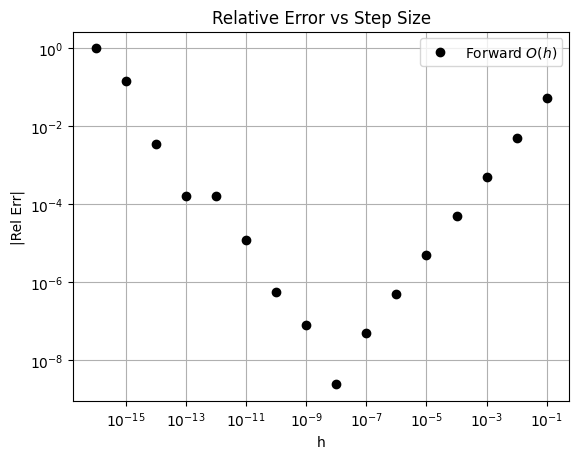

In [6]:
h = np.logspace(-1,-16,16)

err = np.abs(fdiff_error(x,h))/df_exact(x)
plt.loglog(h, err, 'ok', label='Forward $O(h)$')
plt.legend()
plt.grid()
plt.xlabel('h')
plt.ylabel('|Rel Err|')
plt.title('Relative Error vs Step Size')
plt.show()

## Centered Difference
How much better is centered difference?  Is the optimal step size the same or different?

In [7]:
def cdiff(x,h): # forward difference
  return  (f(x+h)-f(x-h))/2/h

def cdiff_error(x,h):
    return cdiff(x,h) - df_exact(x)

In [8]:
x=1
h=1e-7
print(fdiff_error(x,h), cdiff_error(x,h)) # try different step sizes

1.3994668845995761e-07 5.858735718788921e-11


## Error vs Step Size

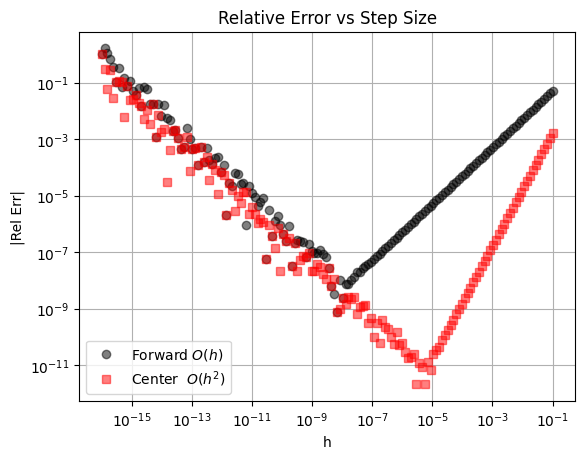

In [9]:
h = np.logspace(-1,-16,160)

err = np.abs(fdiff_error(x,h))/df_exact(x)
errcent = np.abs(cdiff_error(x,h))/df_exact(x)
plt.loglog(h, err, 'ok', label='Forward $O(h)$', alpha=0.5)
plt.loglog(h, errcent, 'rs', label='Center  $O(h^2)$', alpha=0.5)
plt.legend()
plt.grid()
plt.xlabel('h')
plt.ylabel('|Rel Err|')
plt.title('Relative Error vs Step Size')
plt.show()

There is a lot of cool information in this graph.  Make sure you take some time to think through it and ask questions.

On the right size (larger step sizes) the dominant error is **TRUNCATION** since we calculated the result using approximations.  On a log plot we can easily see the slope of the line corresponds to the order of the leading error term (e.g. centered difference is $O(h^2)$ so the slope is 2).

On the left side (smaller step sizes) we see **ROUNDOFF** error.  When $h\approx \epsilon$ the subtraction in the numerator gives zero so the relative error is 1. This error decreases linearly as step size increases.

Where these lines intersect we get the optimal step size.  Note that this depends both on order of the approximation.  For centered difference the optimal step is $h\approx 10^{-5}$.

## Example from Data Points
The only mildly tricky thing about calculating these yourself from data points is dealing with endpoints correctly.

Of course, there is no reason to do this yourself instead of using built-in numpy methods like diff and gradient like we'll see below...

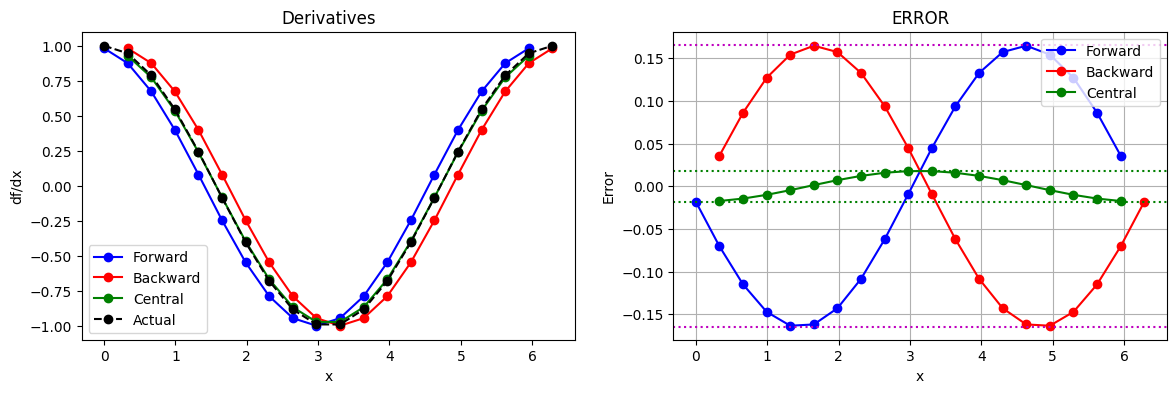

In [10]:
N = 20 # number of sample data points
xdata = np.linspace(0,2*np.pi,num=N)
ydata = np.sin(xdata)
dy_actual = np.cos(xdata)
h = xdata[1]-xdata[0]   # step size dx

# FORWARD
xf = xdata[:-1] # omit last point
dyf = np.zeros_like(xf)
for i in range(N-1):
  dyf[i] = (ydata[i+1] - ydata[i])/h
errf = dyf - dy_actual[:-1]

# BACKWARDS
xb = xdata[1:] # omit first point
dyb = np.zeros_like(xb)
for i in range(1,N):
  dyb[i-1] = (ydata[i] - ydata[i-1])/h
errb = dyb - dy_actual[1:]

# CENTERED
xc = xdata[1:-1] # omit first and last points
dyc = np.zeros_like(xc)
for i in range(1,N-1):
  dyc[i-1] = (ydata[i+1] - ydata[i-1])/2/h
errc = dyc - dy_actual[1:-1]

# PLOTS
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(xf, dyf,'bo-',label='Forward')
plt.plot(xb, dyb,'ro-',label='Backward')
plt.plot(xc, dyc,'go-',label='Central')
plt.plot(xdata, dy_actual,'ko--',label='Actual')
plt.title('Derivatives')
plt.xlabel('x')
plt.ylabel('df/dx')
plt.legend()

plt.subplot(1,2,2)
plt.plot(xf, errf,'bo-',label='Forward')
plt.plot(xb, errb,'ro-',label='Backward')
plt.plot(xc, errc,'go-',label='Central')

# Show error bounds
plt.axhline(h/2,c='m',ls=':')
plt.axhline(-h/2,c='m',ls=':')
plt.axhline(h**2/6,c='g',ls=':')
plt.axhline(-h**2/6,c='g',ls=':')

plt.title("ERROR")
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid()

plt.show()

# Using np.gradient
Quick way to get a centered-difference derivative of an array:

https://numpy.org/doc/stable/reference/generated/numpy.gradient.html

You have lots of choices to specify the step size.  Notice that the end points must come from forward or backward difference so are less accurate.

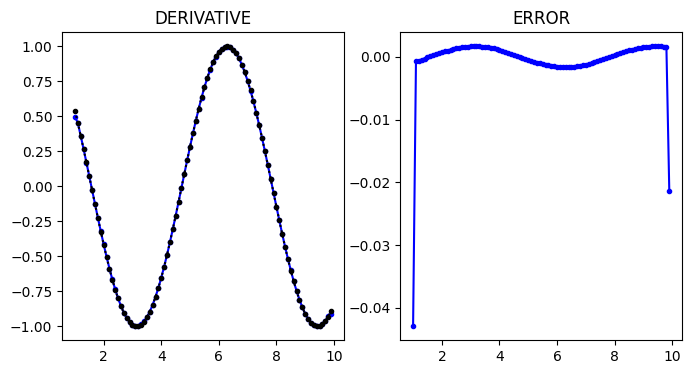

In [11]:
dx = 0.1
xdata = np.arange(1, 10, dx)  # avoiding x=0
ydata = np.sin(xdata)

df_true = np.cos(xdata)
df = np.gradient(ydata,dx)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(xdata, df, 'b.-')
plt.plot(xdata, df_true,'k:.',label='true')
plt.title('DERIVATIVE')

plt.subplot(1,2,2)
plt.plot(xdata, df-df_true, 'b.-')
plt.title('ERROR')

plt.show()

# Richardson Extrapolation
Practice examples of using Richardson Extrapolation to get more accuracy at the cost of evaluating more points.  

We will see in the next topic that Richardson Extrapolation leads to Romberg integration which is the most accurate way of doing integrals on data points.

In [20]:
x=1
h=0.1
print('Forward Diff error: ',fdiff_error(x,h))

Forward Diff error:  0.14056012641483795


Forward difference with a not small step gets a big error

In [17]:
def richardson(f, x, h, p):
  # Richardson Extrap on function f, step size h, error order O(h^p)
  return (2**p * f(x,h) - f(x,2*h)) / (2**p - 1)  # difference from book

In [21]:
R = richardson(fdiff, x, h, 1)
print('Richardson: ',R)

Richardson:  2.7085084383602553


In [28]:
print('Richardson Error: ',R-df_exact(x))

Richardson Error:  -9.071732554488676e-06


Now use Richardson on Central Difference with p=2 since error is $0(h^2)$

In [29]:
print('Cent Diff error: ',cdiff_error(x,h))

R = richardson(cdiff, x, h, 2)
print('Richardson: ',R)
print('Richardson Error: ',R-df_exact(x))

Cent Diff error:  0.00453273548837263
Richardson:  2.7182727567264906
Richardson Error:  -9.071732554488676e-06


Notice that there other Python Libraries that can do this for us easily
* https://github.com/maroba/findiff
* https://github.com/pbrod/numdifftools

# Cubic Spline Interpolation
If you have a cubic polynomial fit to data points then it is trivially easy to get the first 3 derivatives.  Honestly, this is often good enough for many applications.  

There are even spline options in scipy that allow for some smoothing to reduce noise in data such as ```UnivariateSpline```.


In [12]:
from scipy.interpolate import CubicSpline

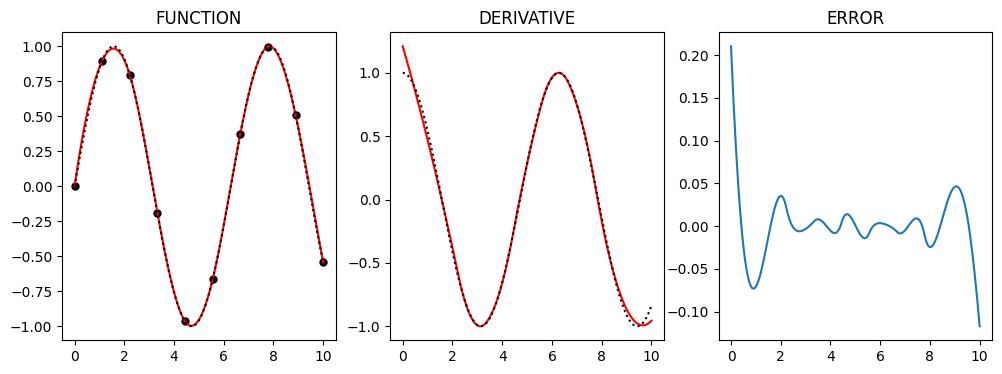

In [13]:
xdata = np.linspace(0, 10, 10)  # make data points
ydata = np.sin(xdata)

cs = CubicSpline(xdata,ydata)
xs = np.linspace(0, 10, 200)
df = cs.derivative() # use df(x) to get derivative at any x

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(xdata, ydata, 'ko', ms=5)
plt.plot(xs, cs(xs), 'r-')
plt.plot(xs, np.sin(xs),'k:',label='true')
plt.title('FUNCTION')

plt.subplot(1,3,2)
plt.plot(xs, df(xs), 'r-')
plt.plot(xs, np.cos(xs),'k:',label='true')
plt.title('DERIVATIVE')

plt.subplot(1,3,3)
plt.plot(xs, df(xs)-np.cos(xs))
plt.title('ERROR')


plt.show()